In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as mn
import matplotlib.pyplot as plt
import itertools
import warnings
warnings.filterwarnings('ignore')

In [37]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [38]:
appDf = pd.read_csv(r"C:\Users\PRASHANTH\Desktop\archive (3)\application_data2.csv")

In [39]:



# Shuffle the rows in the DataFrame
#appDf = Df.sample(frac=1).reset_index(drop=True)

# Save the shuffled DataFrame back to a CSV file
#appDf.to_csv('shuffled_data.csv', index=False)

# Print the first few rows of the shuffled DataFrame
#print("APP DATA:")
#appDf.head()


In [40]:
appDf.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_3,STATUS,EMPLOYMENT_YEARS,DOC_AGE,AGE
0,1,Cash loans,M,Y,0,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,0,Laborers,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,1,0,1,5,25
1,0,Cash loans,F,N,0,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,0.003541,0,Core staff,2.0,1,1,0,0,0,0,0,0,School,1,0,3,0,45
2,0,Revolving loans,M,Y,0,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,0,Laborers,1.0,2,2,0,0,0,0,0,0,Government,0,1,0,6,52
3,0,Cash loans,F,Y,0,135000.0,312682.5,29686.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,0,Laborers,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,1,1,8,6,52
4,0,Cash loans,M,Y,0,121500.0,513000.0,21865.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,0,Core staff,1.0,2,2,0,0,0,0,1,1,Religion,0,1,8,9,54


In [41]:
print("Application DataFrame's shape", appDf.shape)


Application DataFrame's shape (307511, 31)


In [42]:
appDf.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307511 non-null  int64  
 1   NAME_CONTRACT_TYPE           307511 non-null  object 
 2   CODE_GENDER                  307511 non-null  object 
 3   FLAG_OWN_REALTY              307511 non-null  object 
 4   CNT_CHILDREN                 307511 non-null  int64  
 5   AMT_INCOME_TOTAL             307511 non-null  float64
 6   AMT_CREDIT                   307511 non-null  float64
 7   AMT_ANNUITY                  307499 non-null  float64
 8   NAME_TYPE_SUITE              306219 non-null  object 
 9   NAME_INCOME_TYPE             307511 non-null  object 
 10  NAME_EDUCATION_TYPE          307511 non-null  object 
 11  NAME_FAMILY_STATUS           307511 non-null  object 
 12  NAME_HOUSING_TYPE            307511 non-null  object 
 13 

In [43]:
import missingno as mn

<Axes: >

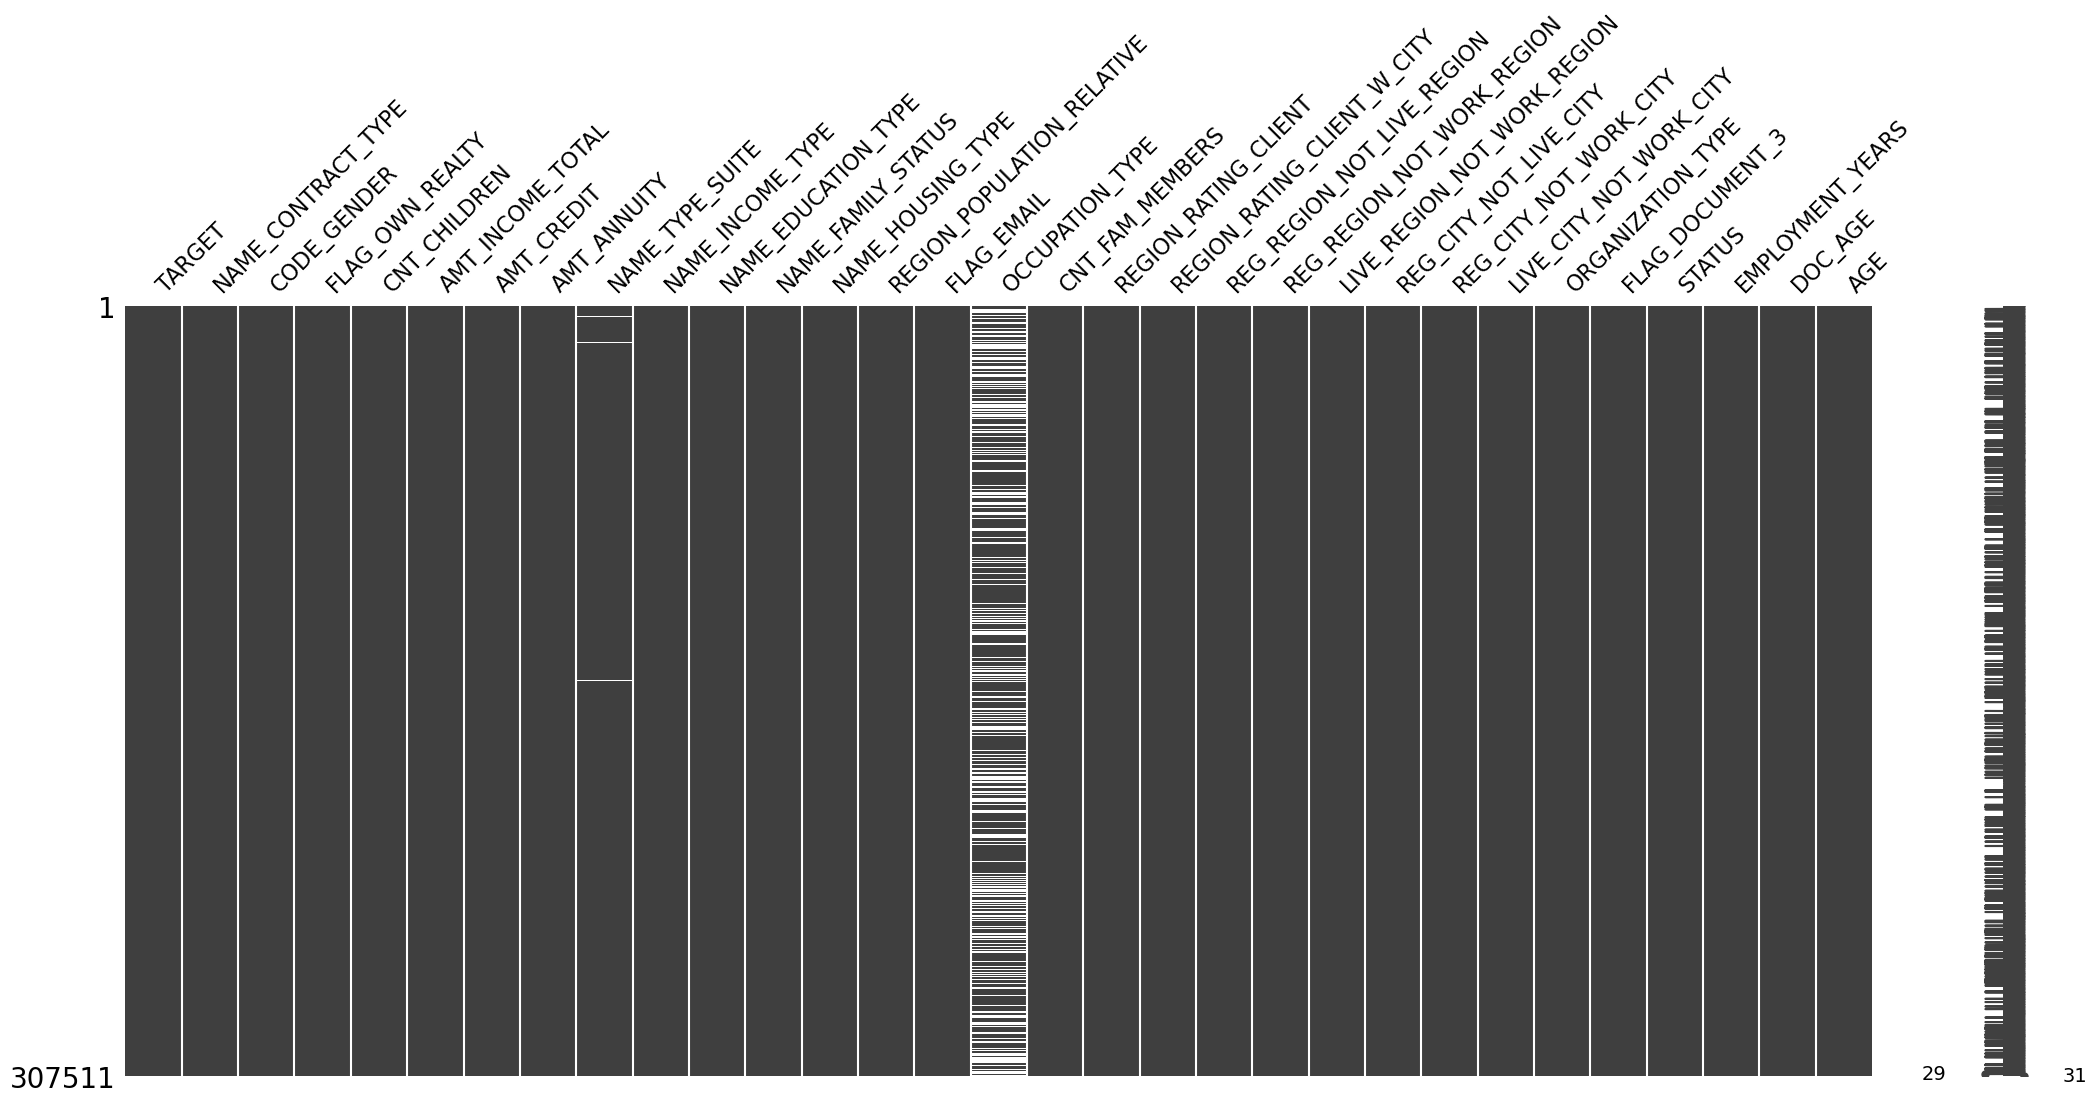

In [44]:
mn.matrix(appDf)

In [45]:
round(appDf.isnull().sum()/appDf.shape[0]*100)

TARGET                          0.0
NAME_CONTRACT_TYPE              0.0
CODE_GENDER                     0.0
FLAG_OWN_REALTY                 0.0
CNT_CHILDREN                    0.0
AMT_INCOME_TOTAL                0.0
AMT_CREDIT                      0.0
AMT_ANNUITY                     0.0
NAME_TYPE_SUITE                 0.0
NAME_INCOME_TYPE                0.0
NAME_EDUCATION_TYPE             0.0
NAME_FAMILY_STATUS              0.0
NAME_HOUSING_TYPE               0.0
REGION_POPULATION_RELATIVE      0.0
FLAG_EMAIL                      0.0
OCCUPATION_TYPE                31.0
CNT_FAM_MEMBERS                 0.0
REGION_RATING_CLIENT            0.0
REGION_RATING_CLIENT_W_CITY     0.0
REG_REGION_NOT_LIVE_REGION      0.0
REG_REGION_NOT_WORK_REGION      0.0
LIVE_REGION_NOT_WORK_REGION     0.0
REG_CITY_NOT_LIVE_CITY          0.0
REG_CITY_NOT_WORK_CITY          0.0
LIVE_CITY_NOT_WORK_CITY         0.0
ORGANIZATION_TYPE               0.0
FLAG_DOCUMENT_3                 0.0
STATUS                      

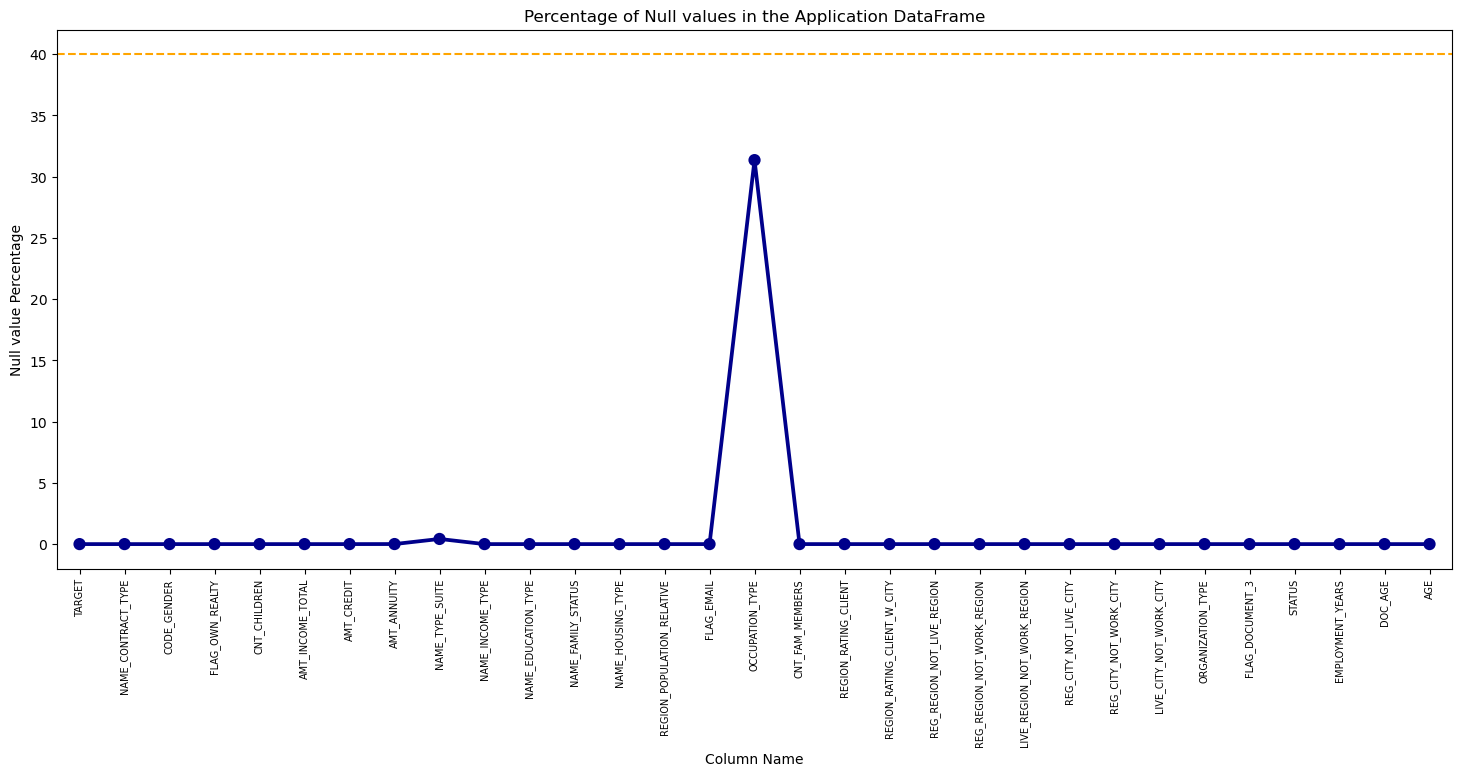

In [46]:
# We will see how many columns have null vlaues more than 40% using this visualisation
null_value_app = pd.DataFrame((appDf.isnull().sum())*100/appDf.shape[0]).reset_index()
null_value_app.columns = ['Column Name', 'Null value Percentage']
fig = plt.figure(figsize = (18,7))
ax = sns.pointplot(x = 'Column Name', y = 'Null value Percentage', data = null_value_app, color = 'darkblue')
plt.xticks(rotation = 90, fontsize = 7)
ax.axhline(40, ls = '--', color = 'orange')
plt.title("Percentage of Null values in the Application DataFrame")
plt.xlabel("Column Name")
plt.ylabel("Null value Percentage")
plt.show()

In [47]:
nullcol_70_app = null_value_app[null_value_app['Null value Percentage']>=60]
nullcol_70_app

,Column Name,Null value Percentage


In [48]:
appDf

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_3,STATUS,EMPLOYMENT_YEARS,DOC_AGE,AGE
0,1,Cash loans,M,Y,0,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,0,Laborers,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,1,0,1,5,25
1,0,Cash loans,F,N,0,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,0.003541,0,Core staff,2.0,1,1,0,0,0,0,0,0,School,1,0,3,0,45
2,0,Revolving loans,M,Y,0,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,0,Laborers,1.0,2,2,0,0,0,0,0,0,Government,0,1,0,6,52
3,0,Cash loans,F,Y,0,135000.0,312682.5,29686.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,0,Laborers,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,1,1,8,6,52
4,0,Cash loans,M,Y,0,121500.0,513000.0,21865.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,0,Core staff,1.0,2,2,0,0,0,0,1,1,Religion,0,1,8,9,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,N,0,157500.0,254700.0,27558.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,0,Sales staff,1.0,1,1,0,0,0,0,0,0,Services,0,0,0,5,25
307507,0,Cash loans,F,Y,0,72000.0,269550.0,12001.5,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,0,NaN,1.0,2,2,0,0,0,0,0,0,XNA,1,1,-1001,11,56
307508,0,Cash loans,F,Y,0,153000.0,677664.0,29979.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,1,Managers,1.0,3,3,0,0,0,0,1,1,School,1,1,21,14,41
307509,1,Cash loans,F,Y,0,171000.0,370107.0,20205.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,0,Laborers,2.0,2,2,0,0,0,1,1,0,Business Entity Type 1,1,0,13,2,32


In [49]:
nullcol_value_40 = null_value_app[null_value_app["Null value Percentage"]>=40]
nullcol_value_40

,Column Name,Null value Percentage


In [50]:
appDf.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307511 non-null  int64  
 1   NAME_CONTRACT_TYPE           307511 non-null  object 
 2   CODE_GENDER                  307511 non-null  object 
 3   FLAG_OWN_REALTY              307511 non-null  object 
 4   CNT_CHILDREN                 307511 non-null  int64  
 5   AMT_INCOME_TOTAL             307511 non-null  float64
 6   AMT_CREDIT                   307511 non-null  float64
 7   AMT_ANNUITY                  307499 non-null  float64
 8   NAME_TYPE_SUITE              306219 non-null  object 
 9   NAME_INCOME_TYPE             307511 non-null  object 
 10  NAME_EDUCATION_TYPE          307511 non-null  object 
 11  NAME_FAMILY_STATUS           307511 non-null  object 
 12  NAME_HOUSING_TYPE            307511 non-null  object 
 13 

In [59]:
Source = appDf[['EXT_SOURCE_1','EXT_SOURCE_2', 'EXT_SOURCE_3', 'TARGET']]
source_corr = Source.corr()
ax = sns.heatmap(source_corr, xticklabels = source_corr.columns, yticklabels = source_corr.columns, annot = True)
#As there is no correlation with respect to the columns the 'EXT_SOURCE_1','EXT_SOURCE_2', 'EXT_SOURCE_3' columns can be

KeyError: "['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'] not in index"

In [60]:
bureau = appDf[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','TARGET']]
bureau_corr = bureau.corr()
ax = sns.heatmap(bureau_corr, xticklabels = bureau_corr.columns, yticklabels = bureau_corr.columns, annot= True )
#As there is no correlation with respect to the 'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
#'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'
#columns the  columns can be dropped

KeyError: "['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'] not in index"

In [53]:
#col = appDf[['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'TARGET']]
#col_corr = col.corr()
#ax = sns.heatmap(col_corr, xticklabels= col_corr.columns, yticklabels= col_corr.columns, annot =True)

KeyError: "['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE'] not in index"

In [54]:
appDf.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307511 non-null  int64  
 1   NAME_CONTRACT_TYPE           307511 non-null  object 
 2   CODE_GENDER                  307511 non-null  object 
 3   FLAG_OWN_REALTY              307511 non-null  object 
 4   CNT_CHILDREN                 307511 non-null  int64  
 5   AMT_INCOME_TOTAL             307511 non-null  float64
 6   AMT_CREDIT                   307511 non-null  float64
 7   AMT_ANNUITY                  307499 non-null  float64
 8   NAME_TYPE_SUITE              306219 non-null  object 
 9   NAME_INCOME_TYPE             307511 non-null  object 
 10  NAME_EDUCATION_TYPE          307511 non-null  object 
 11  NAME_FAMILY_STATUS           307511 non-null  object 
 12  NAME_HOUSING_TYPE            307511 non-null  object 
 13 

In [55]:
appDf = appDf.drop(['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_DOCUMENT_2', 
            'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
            'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR',
            'EXT_SOURCE_1','EXT_SOURCE_2', 'EXT_SOURCE_3', 'BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG',
           'ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG',
           'NONLIVINGAREA_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE',
           'ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE',
           'NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI',
           'FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE',
           'HOUSETYPE_MODE','TOTALAREA_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
           'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE'],axis = 1)

KeyError: "['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE'] not found in axis"

In [56]:
appDf

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_3,STATUS,EMPLOYMENT_YEARS,DOC_AGE,AGE
0,1,Cash loans,M,Y,0,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,0,Laborers,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,1,0,1,5,25
1,0,Cash loans,F,N,0,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,0.003541,0,Core staff,2.0,1,1,0,0,0,0,0,0,School,1,0,3,0,45
2,0,Revolving loans,M,Y,0,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,0,Laborers,1.0,2,2,0,0,0,0,0,0,Government,0,1,0,6,52
3,0,Cash loans,F,Y,0,135000.0,312682.5,29686.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,0,Laborers,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,1,1,8,6,52
4,0,Cash loans,M,Y,0,121500.0,513000.0,21865.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,0,Core staff,1.0,2,2,0,0,0,0,1,1,Religion,0,1,8,9,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,N,0,157500.0,254700.0,27558.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,0,Sales staff,1.0,1,1,0,0,0,0,0,0,Services,0,0,0,5,25
307507,0,Cash loans,F,Y,0,72000.0,269550.0,12001.5,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,0,NaN,1.0,2,2,0,0,0,0,0,0,XNA,1,1,-1001,11,56
307508,0,Cash loans,F,Y,0,153000.0,677664.0,29979.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,1,Managers,1.0,3,3,0,0,0,0,1,1,School,1,1,21,14,41
307509,1,Cash loans,F,Y,0,171000.0,370107.0,20205.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,0,Laborers,2.0,2,2,0,0,0,1,1,0,Business Entity Type 1,1,0,13,2,32


In [ ]:
appDf['age'] = appDf['DAYS_BIRTH']//-365

In [ ]:
appDf['EMPLOYMENT_YEARS'] = appDf['DAYS_EMPLOYED']//-365

In [ ]:
appDf['DOC_AGE'] = appDf['DAYS_ID_PUBLISH']//-365

In [ ]:
appDf = appDf.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH'], axis = 1)

In [ ]:
appDf = appDf.drop(['DAYS_REGISTRATION', 'SK_ID_CURR'], axis = 1)

In [ ]:
appDf = appDf.drop(['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'APARTMENTS_AVG'], axis = 1)

In [ ]:
appDf['AGE'] = appDf['age']

In [ ]:
appDf = appDf.drop(['age'], axis =1)

In [ ]:
appDf

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_3,STATUS,EMPLOYMENT_YEARS,DOC_AGE,AGE
0,1,Cash loans,M,Y,0,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,NaN,0,Laborers,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,1,0,1,5,25
1,0,Cash loans,F,N,0,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,0.003541,NaN,0,Core staff,2.0,1,1,0,0,0,0,0,0,School,1,0,3,0,45
2,0,Revolving loans,M,Y,0,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,26.0,0,Laborers,1.0,2,2,0,0,0,0,0,0,Government,0,1,0,6,52
3,0,Cash loans,F,Y,0,135000.0,312682.5,29686.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,NaN,0,Laborers,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,1,1,8,6,52
4,0,Cash loans,M,Y,0,121500.0,513000.0,21865.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,NaN,0,Core staff,1.0,2,2,0,0,0,0,1,1,Religion,0,1,8,9,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,N,0,157500.0,254700.0,27558.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,NaN,0,Sales staff,1.0,1,1,0,0,0,0,0,0,Services,0,0,0,5,25
307507,0,Cash loans,F,Y,0,72000.0,269550.0,12001.5,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,NaN,0,NaN,1.0,2,2,0,0,0,0,0,0,XNA,1,1,-1001,11,56
307508,0,Cash loans,F,Y,0,153000.0,677664.0,29979.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,NaN,1,Managers,1.0,3,3,0,0,0,0,1,1,School,1,1,21,14,41
307509,1,Cash loans,F,Y,0,171000.0,370107.0,20205.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,NaN,0,Laborers,2.0,2,2,0,0,0,1,1,0,Business Entity Type 1,1,0,13,2,32


In [57]:
suite = appDf[['TARGET', 'OWN_CAR_AGE']]
suite_corr = suite.corr()
ax = sns.heatmap(suite_corr, xticklabels = suite_corr.columns, yticklabels = suite_corr.columns, annot = True)


KeyError: "['OWN_CAR_AGE'] not in index"

<Axes: >

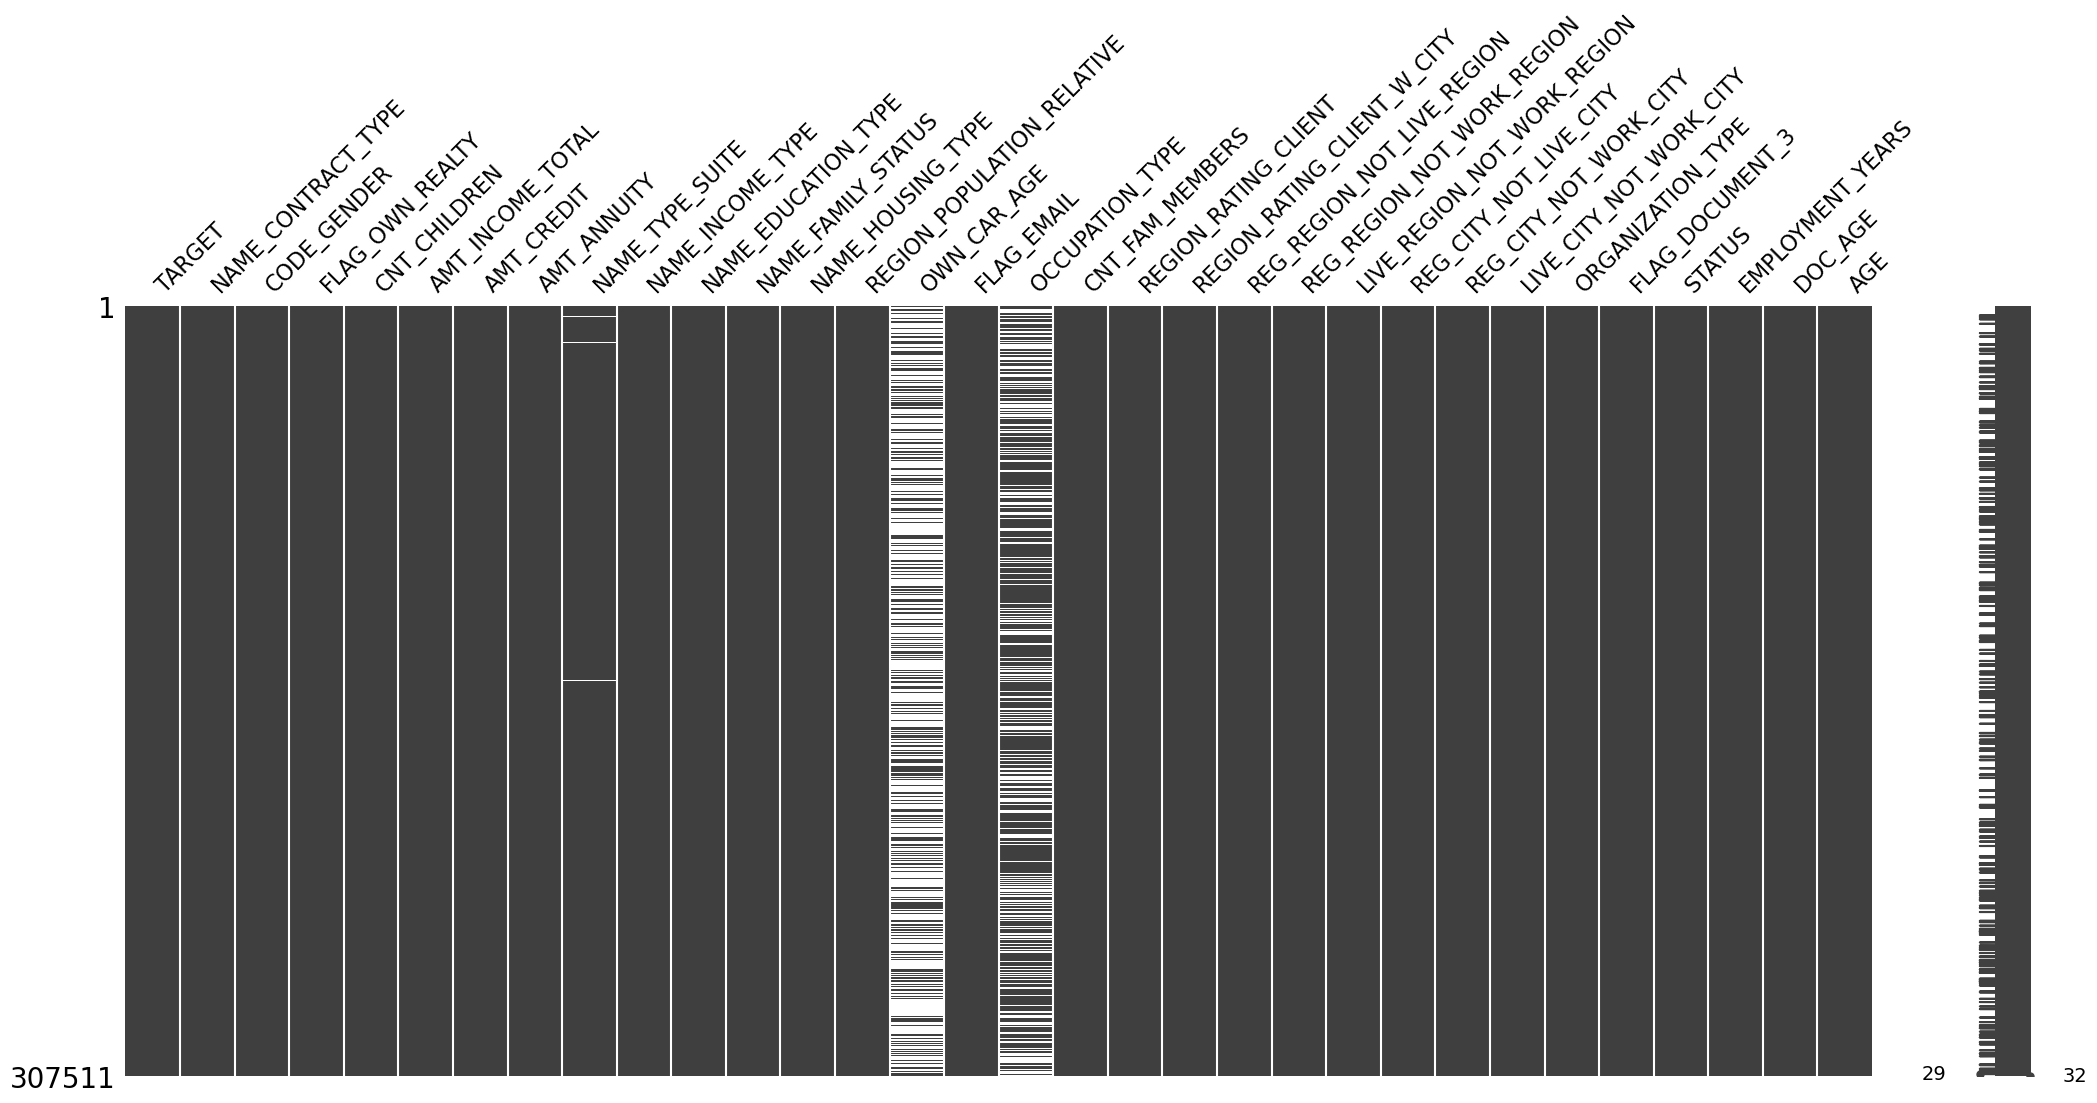

In [ ]:
mn.matrix(appDf)

In [ ]:
#As there is no correlation with respect to the 'TARGET' and 'OWN_CAR_AGE' and with 'OWN_CAR_AGE' having a lot of null values we will drop this column
appDf = appDf.drop(['OWN_CAR_AGE'], axis = 1)

In [ ]:
#appDf = appDf.select_dtypes(include = [np.number])

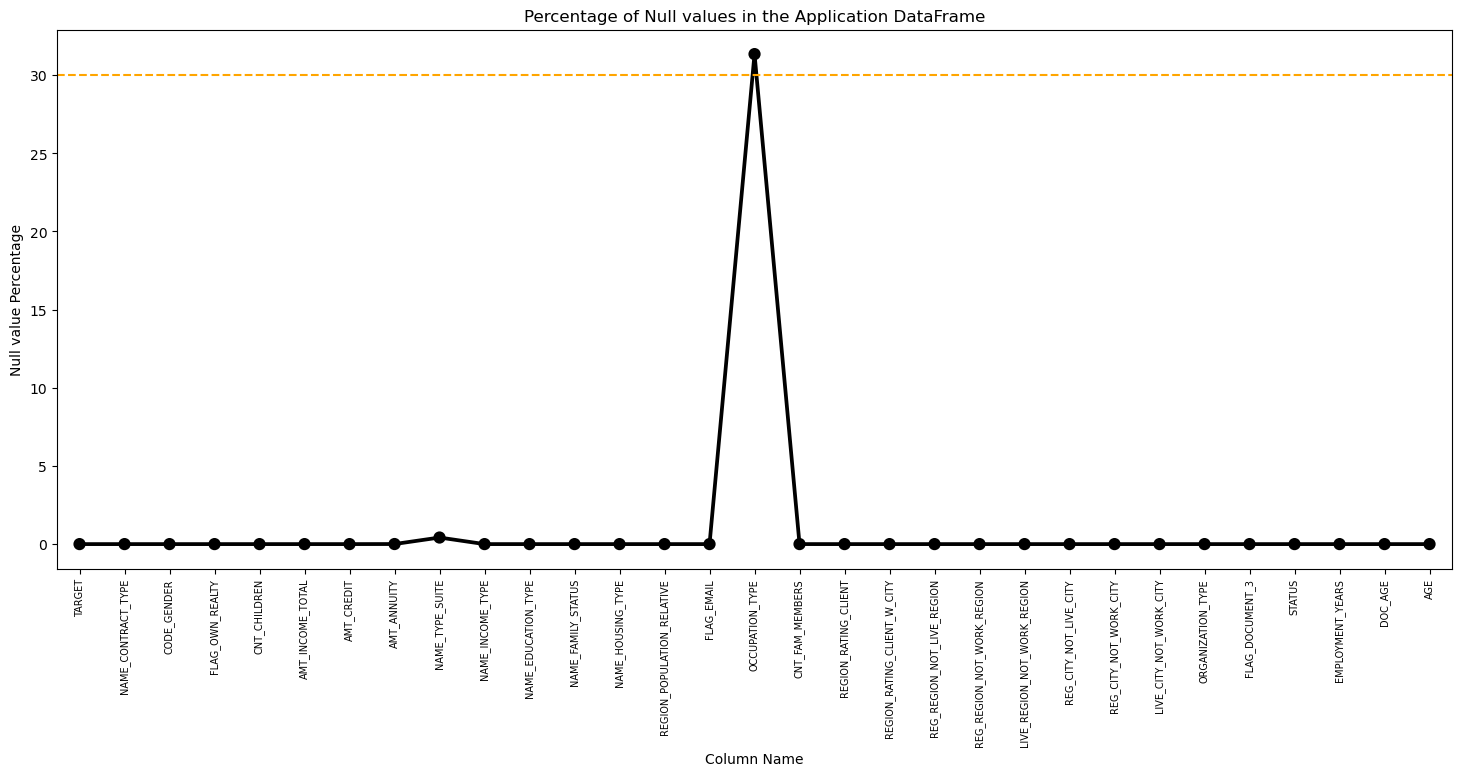

In [ ]:
updated_null = pd.DataFrame((appDf.isnull().sum())*100/appDf.shape[0]).reset_index()
updated_null.columns = ['Column Name', 'Null Percent']
fig = plt.figure(figsize = (18,7))
plt.xticks(rotation = 90, fontsize = 7)
ax = sns.pointplot(x = 'Column Name', y = 'Null Percent', data = updated_null, color = 'black')
ax.axhline(30, ls = '--', color = 'orange')
plt.title("Percentage of Null values in the Application DataFrame")
plt.xlabel("Column Name")
plt.ylabel("Null value Percentage")
plt.show()

In [ ]:
updated_null_30 = updated_null[updated_null['Null Percent']>=0]
updated_null_30

,Column Name,Null Percent
0,TARGET,0.000000
1,NAME_CONTRACT_TYPE,0.000000
2,CODE_GENDER,0.000000
3,FLAG_OWN_REALTY,0.000000
4,CNT_CHILDREN,0.000000
5,AMT_INCOME_TOTAL,0.000000
6,AMT_CREDIT,0.000000
7,AMT_ANNUITY,0.003902
8,NAME_TYPE_SUITE,0.420148
9,NAME_INCOME_TYPE,0.000000


In [ ]:
# Create a new column 'STATUS' and initialize with 'Rejected'
#appDf['STATUS'] = 0

# Update status to 'Accepted' for the specified conditions
#appDf.loc[(appDf['TARGET'] == 0) &
       #(appDf['AMT_INCOME_TOTAL'] >= 50000) &
#        (appDf['AMT_CREDIT'] < 1000000) &
#       (appDf['NAME_CONTRACT_TYPE'].isin(['Cash loans', 'Revolving loans'])) &
#        (appDf['CODE_GENDER'].isin(['M', 'F'])) &
#        #(appDf['FLAG_OWN_CAR'].isin(['Y', 'N'])) &
       #(appDf['FLAG_OWN_REALTY'].isin(['Y'])), 'STATUS'] = 1
#appDf
#print(appDf['CNT_CHILDREN'])
# # Save the modified DataFrame to a new CSV file (replace 'output_file.csv' with your desired file path)
# appDf.to_csv(r"C:/Users/Milindh R Kashyap/Desktop/DS Project/archive (3)/application_data3.csv", index=False)

In [5]:
appDf = pd.read_csv(r"C:\Users\PRASHANTH\Desktop\archive (3)\application_data2.csv")

In [6]:
# Create a new column 'STATUS' and initialize with 'Rejected'
appDf['STATUS'] = 0

# Update status to 'Accepted' for the specified conditions
appDf.loc[(appDf['TARGET'] == 0) &
       (appDf['AMT_INCOME_TOTAL'] >= 50000) &
       (appDf['FLAG_OWN_REALTY'].isin(['Y'])), 'STATUS'] = 1

# Save the modified DataFrame to a new CSV file
# Replace 'output_file.csv' with your desired file path
appDf.to_csv(r"C:\Users\PRASHANTH\Desktop\archive (3)\application_data2.csv", index=False)

# Print a message indicating the successful export
print("Data has been exported to 'application_data3.csv'")


Data has been exported to 'application_data3.csv'


In [7]:
value_counts = appDf['STATUS'].value_counts()
print(value_counts)

1    193529
0    113982
Name: STATUS, dtype: int64


In [8]:
appDf = appDf[['TARGET','AMT_INCOME_TOTAL','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_REALTY','CNT_CHILDREN','STATUS']]

In [65]:
appDf.head()

,TARGET,AMT_INCOME_TOTAL,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,STATUS
0,1,202500.0,Cash loans,M,Y,0,0
1,0,270000.0,Cash loans,F,N,0,0
2,0,67500.0,Revolving loans,M,Y,0,1
3,0,135000.0,Cash loans,F,Y,0,1
4,0,121500.0,Cash loans,M,Y,0,1


Summary Statistics:
              STATUS  AMT_INCOME_TOTAL   CNT_CHILDREN
count  307511.000000      3.075110e+05  307511.000000
mean        0.629340      1.687979e+05       0.417052
std         0.482982      2.371231e+05       0.722121
min         0.000000      2.565000e+04       0.000000
25%         0.000000      1.125000e+05       0.000000
50%         1.000000      1.471500e+05       0.000000
75%         1.000000      2.025000e+05       1.000000
max         1.000000      1.170000e+08      19.000000


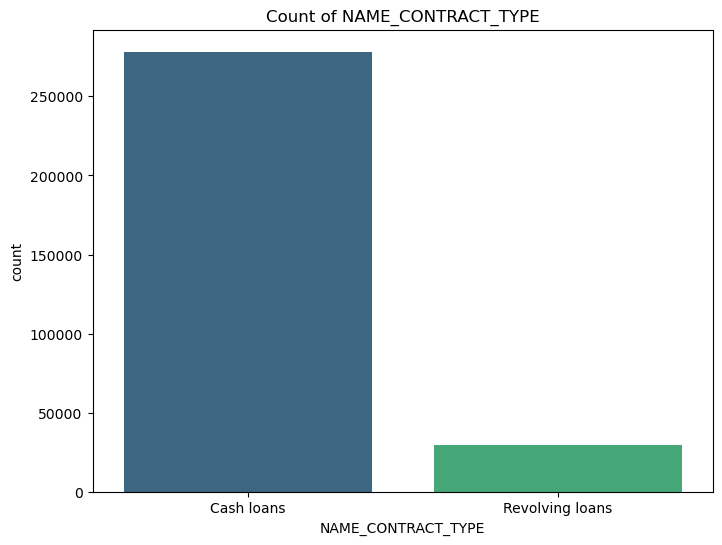

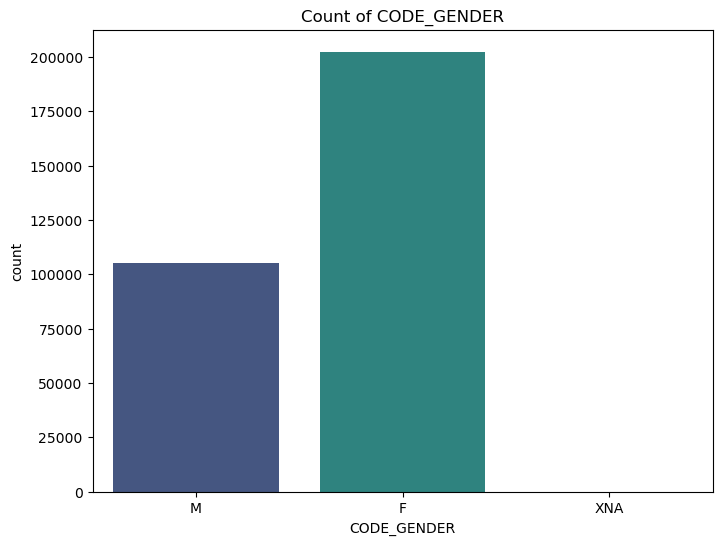

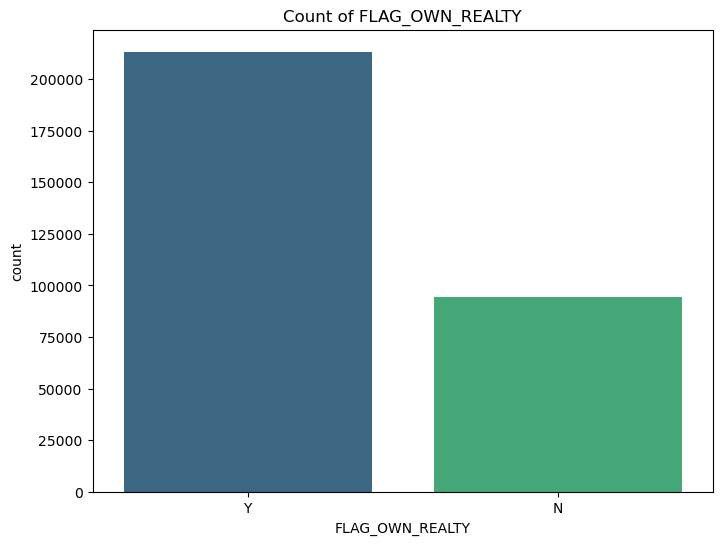

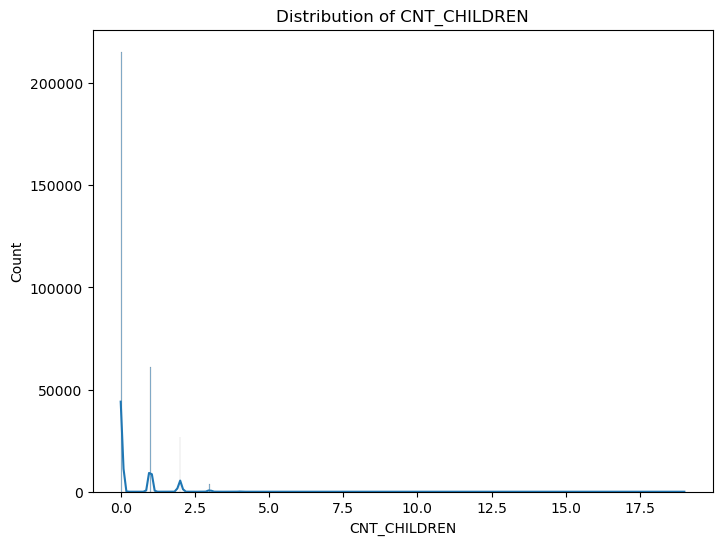

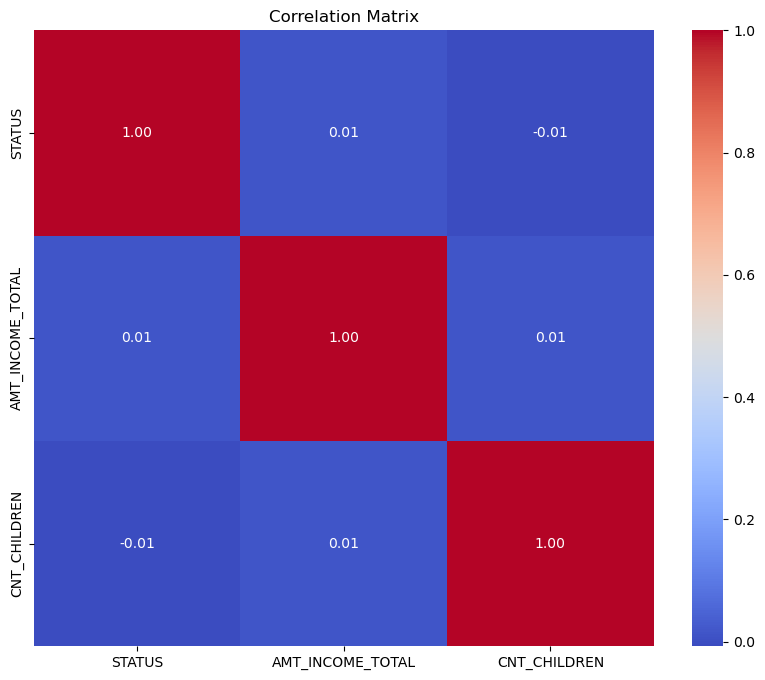

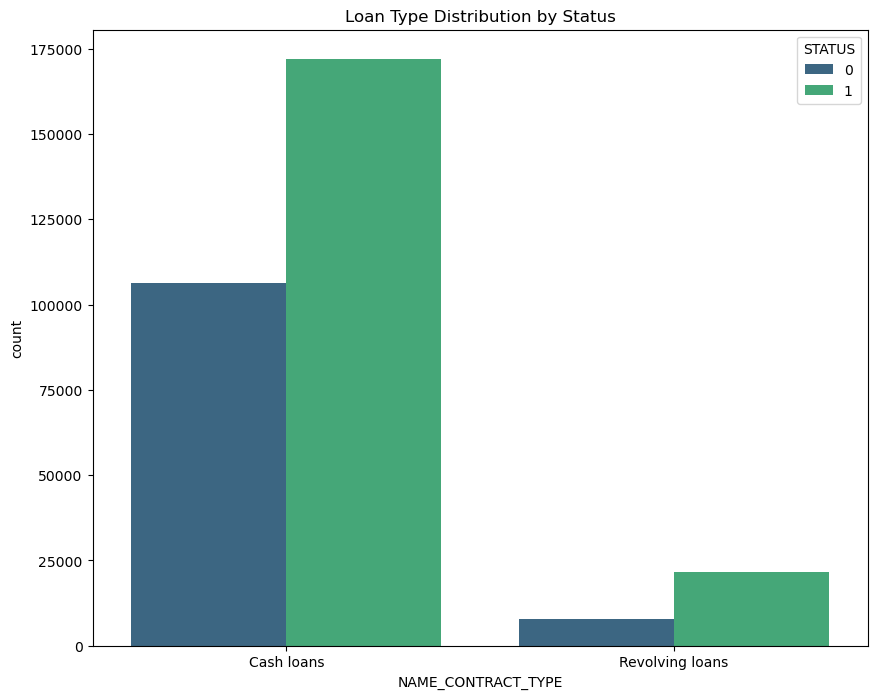

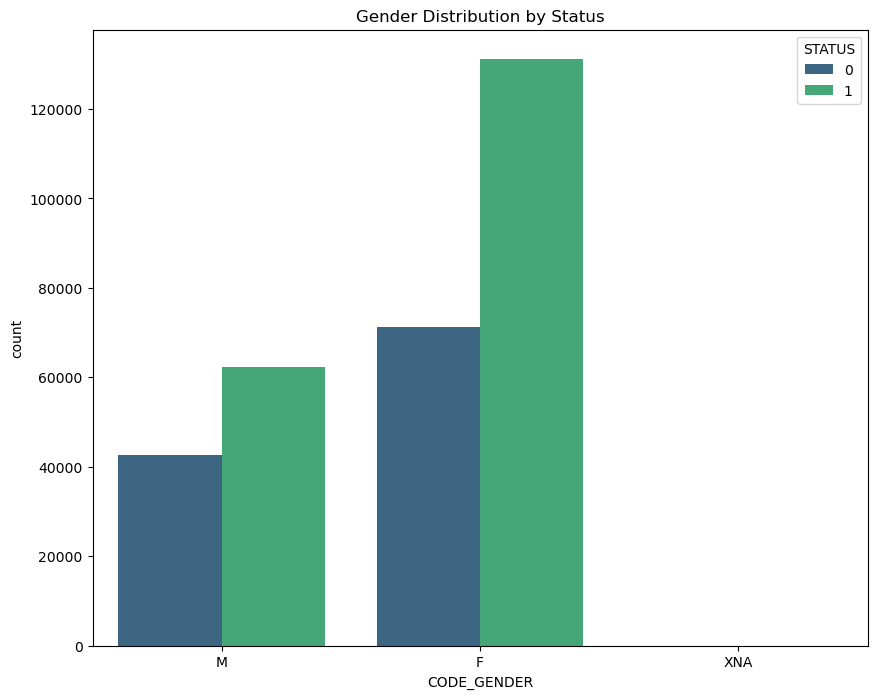

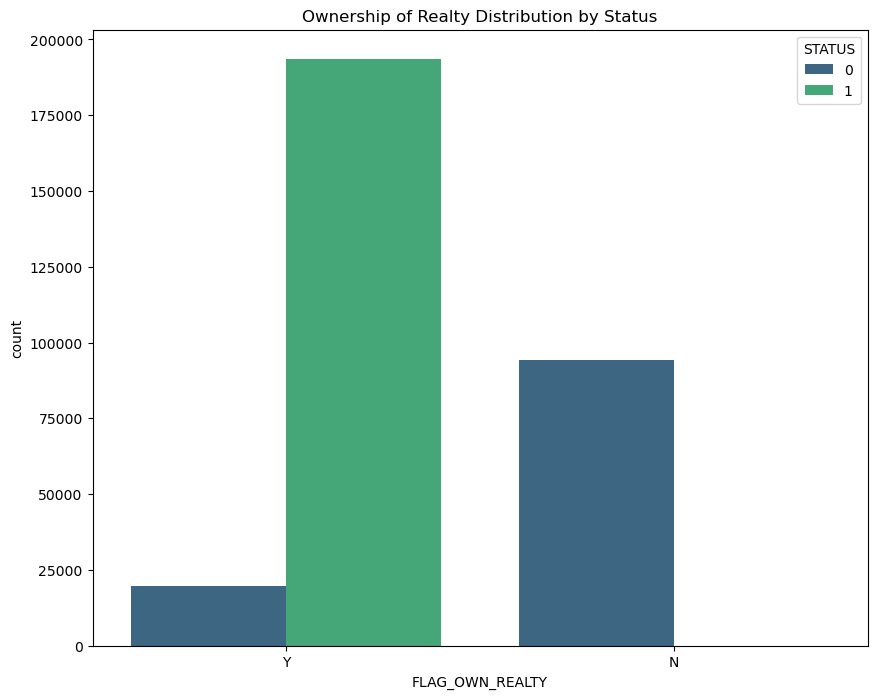

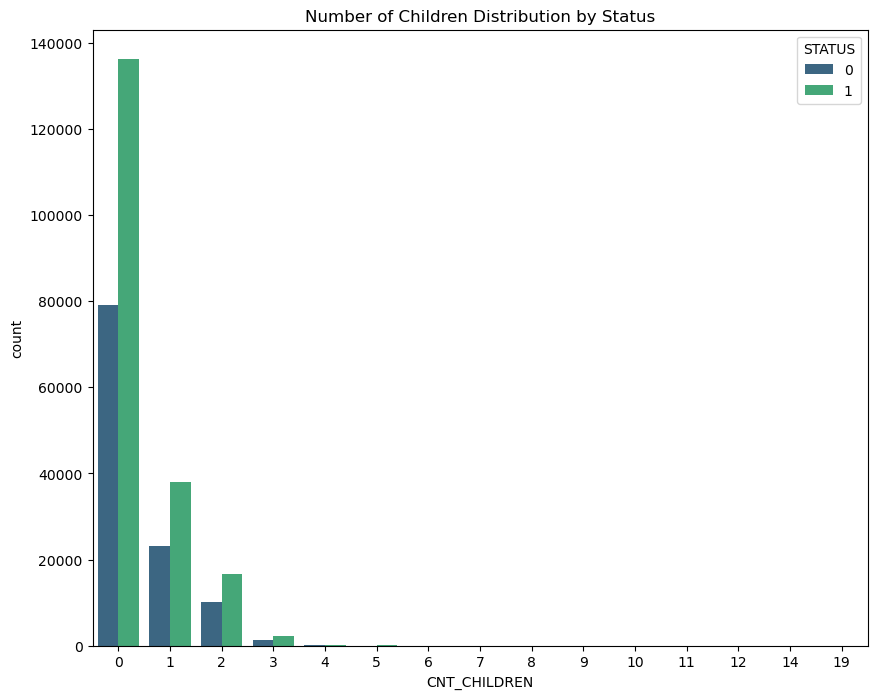

In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming appDf is your DataFrame

# Selecting specific columns for analysis
selected_columns = ['STATUS', 'AMT_INCOME_TOTAL', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'CNT_CHILDREN']
eda_df = appDf[selected_columns]

# Summary statistics
summary_stats = eda_df.describe()
print("Summary Statistics:")
print(summary_stats)

# Data distribution and visualization
for column in eda_df.columns:
    if column not in ['STATUS', 'AMT_INCOME_TOTAL']:
        if eda_df[column].dtype != 'O':  # Numeric columns
            plt.figure(figsize=(8, 6))
            sns.histplot(eda_df[column], kde=True)
            plt.title(f'Distribution of {column}')
            plt.show()
        else:  # Categorical columns
            plt.figure(figsize=(8, 6))
            sns.countplot(x=column, data=eda_df, palette='viridis')
            plt.title(f'Count of {column}')
            plt.show()

# Correlation analysis
correlation_matrix = eda_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Additional analysis for specific columns

# Analysis for 'NAME_CONTRACT_TYPE'
plt.figure(figsize=(10, 8))
sns.countplot(x='NAME_CONTRACT_TYPE', hue='STATUS', data=eda_df, palette='viridis')
plt.title('Loan Type Distribution by Status')
plt.show()

# Analysis for 'CODE_GENDER'
plt.figure(figsize=(10, 8))
sns.countplot(x='CODE_GENDER', hue='STATUS', data=eda_df, palette='viridis')
plt.title('Gender Distribution by Status')
plt.show()

# Analysis for 'FLAG_OWN_REALTY'
plt.figure(figsize=(10, 8))
sns.countplot(x='FLAG_OWN_REALTY', hue='STATUS', data=eda_df, palette='viridis')
plt.title('Ownership of Realty Distribution by Status')
plt.show()

# Analysis for 'CNT_CHILDREN'
plt.figure(figsize=(10, 8))
sns.countplot(x='CNT_CHILDREN', hue='STATUS', data=eda_df, palette='viridis')
plt.title('Number of Children Distribution by Status')
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming you have already created and updated the 'STATUS' column in appDf

# Select relevant columns for training
columns_for_training = ['TARGET', 'AMT_INCOME_TOTAL', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'CNT_CHILDREN'] 
X = appDf[columns_for_training]

# Target variable
y = appDf['STATUS']

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use one-hot encoding for categorical variables
categorical_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY']
numeric_cols = ['AMT_INCOME_TOTAL', 'CNT_CHILDREN']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Create a logistic regression model
logistic_model = LogisticRegression(solver = 'saga', max_iter=500)

# Train the model on the training set
logistic_model.fit(X_train_preprocessed, y_train)

# Predictions on the test set
y_pred = logistic_model.predict(X_test_preprocessed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy:.2f}')




Accuracy on the test set: 0.63


Accuracy on the test set: 0.63
Confusion Matrix:
[[    0 23002]
 [    0 38501]]
Precision: 0.63
Recall: 1.00
F1 Score: 0.77


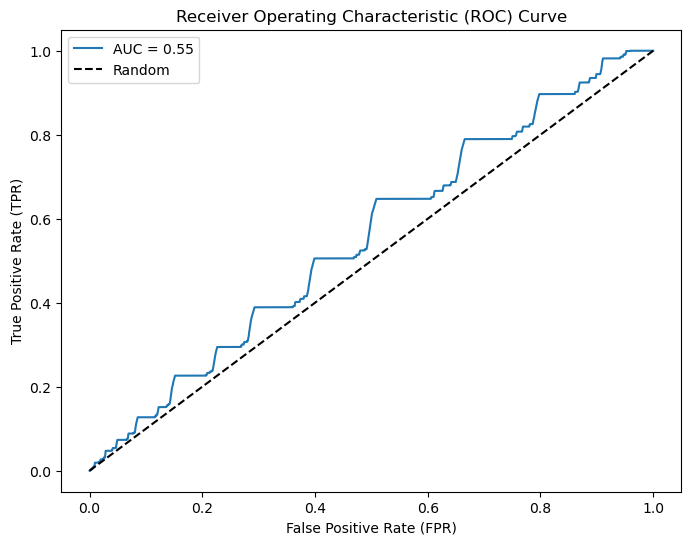

In [10]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have already created and updated the 'STATUS' column in appDf
columns_for_training = ['TARGET', 'AMT_INCOME_TOTAL', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'CNT_CHILDREN'] 
X = appDf[columns_for_training]
y = appDf['STATUS']

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use one-hot encoding for categorical variables
categorical_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY']
numeric_cols = ['AMT_INCOME_TOTAL', 'CNT_CHILDREN']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Create a logistic regression model
logistic_model = LogisticRegression(solver='saga', max_iter=500)

# Train the model on the training set
logistic_model.fit(X_train_preprocessed, y_train)

# Predictions on the test set
y_pred = logistic_model.predict(X_test_preprocessed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Precision, Recall, and F1 Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# ROC Curve and AUC Score
y_probs = logistic_model.predict_proba(X_test_preprocessed)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [11]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

# Define the parameter distributions to sample from
param_dist = {
    'C': loguniform(1e-4, 1e4),  # Regularization strength (log-uniform distribution)
    'penalty': ['l1', 'l2'],  # Regularization type
    'max_iter': [100, 500, 1000]  # Maximum number of iterations
}

# Create a logistic regression model
logistic_model = LogisticRegression(solver='saga')

# Use RandomizedSearchCV to randomly sample hyperparameters
random_search = RandomizedSearchCV(logistic_model, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train_preprocessed, y_train)

# Print the best hyperparameters
best_params_random = random_search.best_params_
print(f"Best Hyperparameters (Randomized Search): {best_params_random}")

# Get the best model
best_logistic_model_random = random_search.best_estimator_

# Predictions on the test set using the best model from Randomized Search
y_pred_best_random = best_logistic_model_random.predict(X_test_preprocessed)

# Calculate accuracy using the best model from Randomized Search
accuracy_best_random = accuracy_score(y_test, y_pred_best_random)
print(f'Accuracy on the test set with best model (Randomized Search): {accuracy_best_random:.2f}')


Best Hyperparameters (Randomized Search): {'C': 0.09915644566638389, 'max_iter': 100, 'penalty': 'l1'}
Accuracy on the test set with best model (Randomized Search): 0.63


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming you have already created and updated the 'STATUS' column in appDf

# Select relevant columns for training
# print(appDf)
columns_for_training = ['AMT_INCOME_TOTAL', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'CNT_CHILDREN'] 
X = appDf[columns_for_training]

# Target variable
y = appDf['STATUS']

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Use one-hot encoding for categorical variables
categorical_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY']
numeric_cols = ['AMT_INCOME_TOTAL', 'CNT_CHILDREN']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])
print(X_train)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)
# Create a logistic regression model
randF = RandomForestClassifier()

# Train the model on the training set
randF.fit(X_train_preprocessed, y_train)
y_train_pred = randF.predict(X_train_preprocessed)
# Predictions on the test set
y_pred = randF.predict(X_test_preprocessed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy:.2f}')


accuracy_train = accuracy_score(y_train, y_train_pred)
print(f'Accuracy on the train set: {accuracy_train:.2f}')



        AMT_INCOME_TOTAL NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_REALTY  \
127044          157500.0         Cash loans           F               N   
281143          121500.0         Cash loans           F               Y   
199799          225000.0         Cash loans           M               Y   
306749          144000.0    Revolving loans           F               Y   
301347          112500.0         Cash loans           F               Y   
...                  ...                ...         ...             ...   
119879          121500.0         Cash loans           F               Y   
259178          225000.0         Cash loans           F               N   
131932          450000.0         Cash loans           M               Y   
146867          180000.0    Revolving loans           M               Y   
121958          157500.0         Cash loans           M               Y   

        CNT_CHILDREN  
127044             0  
281143             1  
199799             1  
306749 

In [15]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distributions to sample from
param_dist = {
    'n_estimators': randint(10, 200),
    'max_depth': [None] + list(randint(2, 20).rvs(10)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Create a random forest model
random_forest = RandomForestClassifier()

# Use RandomizedSearchCV to randomly sample hyperparameters
random_search = RandomizedSearchCV(random_forest, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train_preprocessed, y_train)

# Print the best hyperparameters
best_params_random = random_search.best_params_
print(f"Best Hyperparameters (Randomized Search): {best_params_random}")

# Get the best model
best_random_forest_random = random_search.best_estimator_

# Predictions on the test set using the best model from Randomized Search
y_pred_best_random = best_random_forest_random.predict(X_test_preprocessed)

# Calculate accuracy using the best model from Randomized Search
accuracy_best_random = accuracy_score(y_test, y_pred_best_random)
print(f'Accuracy on the test set with best model (Randomized Search): {accuracy_best_random:.2f}')


Best Hyperparameters (Randomized Search): {'bootstrap': True, 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 5, 'n_estimators': 113}
Accuracy on the test set with best model (Randomized Search): 0.95


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming you have already created and updated the 'STATUS' column in appDf

# Select relevant columns for training
columns_for_training = ['AMT_INCOME_TOTAL', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'CNT_CHILDREN'] 
X = appDf[columns_for_training]

# Target variable
y = appDf['STATUS']

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use one-hot encoding for categorical variables
categorical_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY']
numeric_cols = ['AMT_INCOME_TOTAL', 'CNT_CHILDREN']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Create a decision tree model
decision_tree = DecisionTreeClassifier()

# Train the model on the training set
decision_tree.fit(X_train_preprocessed, y_train)

# Predictions on the training set
y_train_pred = decision_tree.predict(X_train_preprocessed)

# Calculate accuracy for training set
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f'Accuracy on the training set: {accuracy_train:.2f}')

# Predictions on the test set
y_pred = decision_tree.predict(X_test_preprocessed)

# Calculate accuracy for test set
accuracy_test = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy_test:.2f}')


Accuracy on the training set: 0.95
Accuracy on the test set: 0.94


Accuracy on the training set: 0.95
Accuracy on the test set: 0.94
Confusion Matrix:
[[19660  3342]
 [   55 38446]]
Precision: 0.92
Recall: 1.00
F1 Score: 0.96


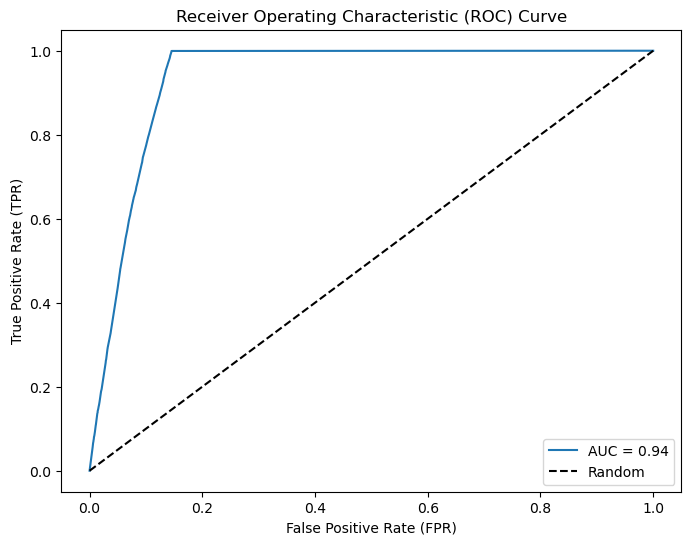

In [15]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have already created and updated the 'STATUS' column in appDf
columns_for_training = ['AMT_INCOME_TOTAL', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'CNT_CHILDREN'] 
X = appDf[columns_for_training]
y = appDf['STATUS']

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use one-hot encoding for categorical variables
categorical_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY']
numeric_cols = ['AMT_INCOME_TOTAL', 'CNT_CHILDREN']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Create a decision tree model
decision_tree = DecisionTreeClassifier()

# Train the model on the training set
decision_tree.fit(X_train_preprocessed, y_train)

# Predictions on the training set
y_train_pred = decision_tree.predict(X_train_preprocessed)

# Calculate accuracy for training set
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f'Accuracy on the training set: {accuracy_train:.2f}')

# Predictions on the test set
y_pred = decision_tree.predict(X_test_preprocessed)

# Calculate accuracy for test set
accuracy_test = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy_test:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Precision, Recall, and F1 Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# ROC Curve and AUC Score
y_scores = decision_tree.predict_proba(X_test_preprocessed)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming you have already created and updated the 'STATUS' column in appDf

# Select relevant columns for training
columns_for_training = ['AMT_INCOME_TOTAL', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'CNT_CHILDREN'] 
X = appDf[columns_for_training]

# Target variable
y = appDf['STATUS']

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use one-hot encoding for categorical variables
categorical_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY']
numeric_cols = ['AMT_INCOME_TOTAL', 'CNT_CHILDREN']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Define the parameter distributions to sample from
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None] + list(randint(2, 20).rvs(10)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

# Create a decision tree model
decision_tree = DecisionTreeClassifier()

# Use RandomizedSearchCV to randomly sample hyperparameters
random_search = RandomizedSearchCV(decision_tree, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train_preprocessed, y_train)

# Print the best hyperparameters
best_params_random = random_search.best_params_
print(f"Best Hyperparameters (Randomized Search): {best_params_random}")

# Get the best model
best_decision_tree_random = random_search.best_estimator_

# Predictions on the test set using the best model from Randomized Search
y_pred_best_random = best_decision_tree_random.predict(X_test_preprocessed)

# Calculate accuracy using the best model from Randomized Search
accuracy_best_random = accuracy_score(y_test, y_pred_best_random)
print(f'Accuracy on the test set with best model (Randomized Search): {accuracy_best_random:.2f}')


Best Hyperparameters (Randomized Search): {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 9, 'min_samples_split': 8, 'splitter': 'best'}
Accuracy on the test set with best model (Randomized Search): 0.95
